* it's really great at compairing value
* histograme and box plots are good at showing distribution of numerical values and box plots are very much coordinated to this

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r"C:\Users\HP\Desktop\ASHFA\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

655377     57500.0
56787      90000.0
560871     95680.0
563707     67500.0
272327    127000.0
773370     62500.0
672646    123050.0
478223    100000.0
438670     79500.0
347203    137500.0
Name: salary_year_avg, dtype: float64

<Axes: >

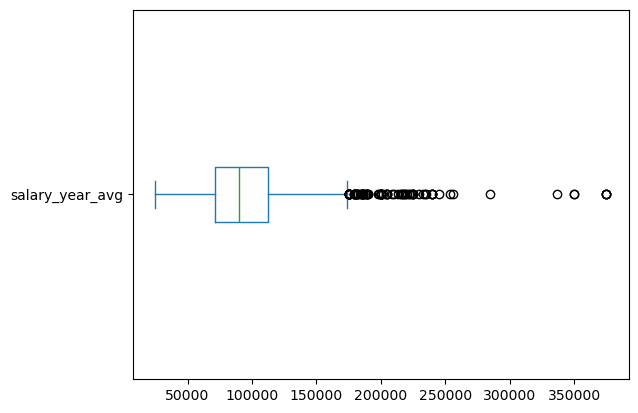

In [7]:
# using pandas
df_DA_US['salary_year_avg'].plot(
    kind='box',  
    vert=False    # vert means vertical
    )

{'whiskers': [<matplotlib.lines.Line2D at 0x24902c27cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x24902c2d010>,
 'boxes': [<matplotlib.lines.Line2D at 0x24902c27310>],
 'medians': [<matplotlib.lines.Line2D at 0x24902c2e210>],
 'fliers': [<matplotlib.lines.Line2D at 0x24902c2eb90>],
 'means': []}

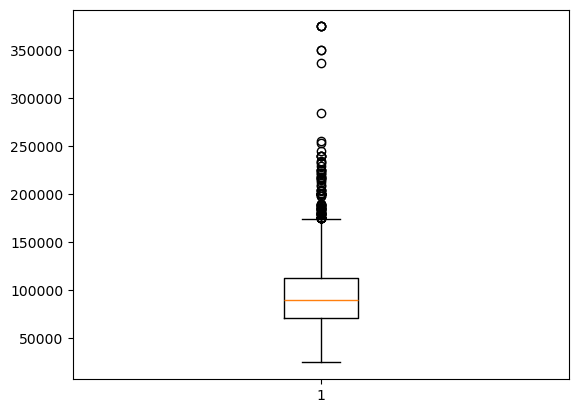

In [6]:
# using matplotlib
plt.boxplot(df_DA_US['salary_year_avg'])

* in middle line of box shows 50th percentile value (median)
* box itself has on the left side is at the 25th % and other side 75%
* so everything in the box is 50% of the data also known as "interquartile range"
* out of the box liners are referred as box & whiskers chart from time to time
* the lines( | ) are going up & down on each side are meant to signify the min & max
* that's are not true min & max 
* some data points are protrude even further out, those are ' outliers'


# comparing different salaries of different job titles 

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])


In [19]:
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [27]:
# creating a salary year avg series for each job titles
# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_2764\1291440455.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


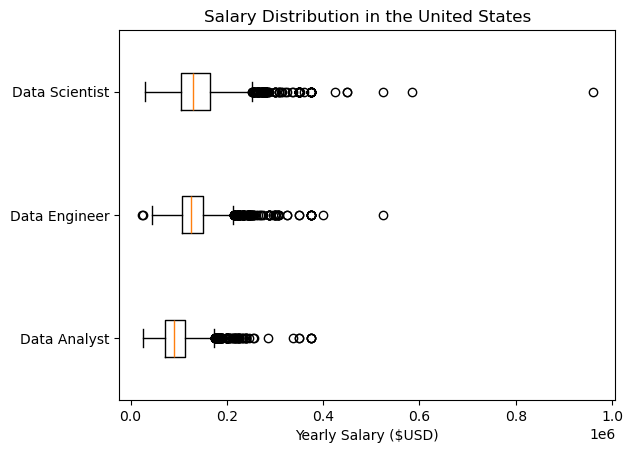

In [ ]:
plt.boxplot(job_list, labels=job_titles, vert=False)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2764\2141833509.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


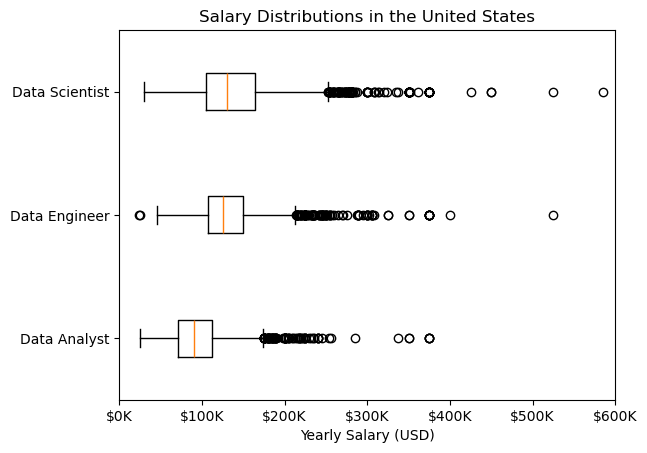

In [ ]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)       # removing ouliere

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()